In [1]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

from src.benchmark.utils import parser
path = "data/benchmark"

In [2]:
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
num_exp = len(json_files)

In [3]:
data = []
for index, js in enumerate(json_files):
    with open(os.path.join(path, js)) as json_file:
        data.append(json.load(json_file))

In [10]:
random, greedy, sarsa = parser(data)
num_exp = len(random)
delta = sarsa['gamma'][1] - sarsa['gamma'][0]
epochs = len(random["reward"][0])

In [11]:
S = [s for s in random["reward"]]
Ravg_random = np.mean(S, axis=0)

In [12]:
S = [s for s in greedy["reward"]]
Ravg_greedy = np.mean(S, axis=0)

In [13]:
Ravg_sarsa = []

for e in np.arange(0, 1+delta, delta):
    for a in np.arange(0, 1+delta, delta):
        for y in np.arange(0, 1+delta, delta):

            S = sarsa.loc[sarsa['epsilon']==e].loc[sarsa['alpha']==a].loc[sarsa['gamma']==y]['reward']
            S = [s for s in S]
            Ravg_sarsa.append([[e, a, y], np.mean(S, axis=0)])

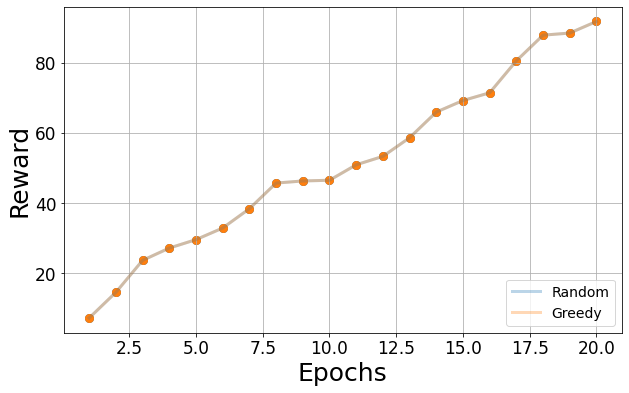

In [14]:
plt.figure(figsize=(10,6))

# plot data
plt.scatter(range(1,epochs+1), Ravg_random, linewidth=3)
plt.plot(range(1,epochs+1), Ravg_random, linewidth=3, alpha=0.3, label='Random')

plt.scatter(range(1,epochs+1), Ravg_random, linewidth=3)
plt.plot(range(1,epochs+1), Ravg_random, linewidth=3, alpha=0.3, label='Greedy')

# plot beauty
plt.ylabel('Reward', fontsize=25)
plt.xlabel('Epochs', fontsize=25)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.legend(fontsize = '14',loc="lower right")
# plt.savefig('benchmark.pdf', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)
plt.show()

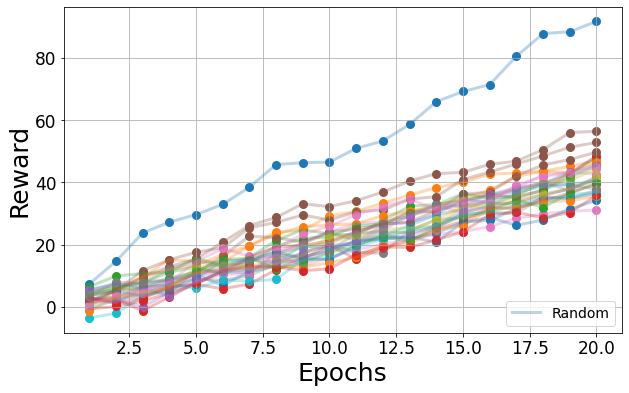

In [15]:
plt.figure(figsize=(10,6))

# plot data
plt.scatter(range(1,epochs+1), Ravg_random, linewidth=3)
plt.plot(range(1,epochs+1), Ravg_random, linewidth=3, alpha=0.3, label='Random')

for r in Ravg_sarsa:
    plt.scatter(range(1,epochs+1), r[1], linewidth=3)
    plt.plot(range(1,epochs+1), r[1], linewidth=3, alpha=0.3)

# plot beauty
plt.ylabel('Reward', fontsize=25)
plt.xlabel('Epochs', fontsize=25)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.legend(fontsize = '14',loc="lower right")
# plt.savefig('benchmark.pdf', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)
plt.show()